### Contoh Kasus Kalla Food

Sebuah perusahaan retail dibidang makanan.

Menjual 5 kategori produk yaitu :

1. wines
2. rere meat
3. exotic fruits
4. special fish
5. sweet product

Dari ke-lima kategori product tersebut terbagi lagi menjadi 2 peoduk, yaitu :
1. Gold Product
2. Regular Product

Terdapat 3 sales channels :
1. Pyhsical store
2. catalogs
3. company's website


### Masalah Campaign Kalla Food

#### Sebelumnya :
Perusahaan Kalla food secara global memiliki pendapatan yang sehat di 3 tahun terakhir ini.

#### Sekarang :
Namun, jika dilihat dari prospektif pertumbuhan selama tiga tahun kedepan tidak menjanjikan.

#### Selanjutnya :
Maka dari itu, diperlukan inisiatif strategik untuk membalikkan situasi tersebut, salah satunya adalah dengan cara meningkatkan performa dibagian marketing dengan fokus di marketing campaign.


### JOB
Departement Marketing Kalla Food ingin megoptimasi campaign result dengan menggunakan data set yang sudah dimiliki oleh departement marketing, salah satu cara yang dapat dilakukan adalah dengan membuat predictive model untuk mendapatkan profit yang maksimal pada marketing campaign, serta memahami karakteristik customers yang ingin membeli produk baru tersebut.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option ('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv('C:\\Users\\muh.muhaimin nur\\Downloads\\campaign_marketing\\marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [10]:
df.shape

(2240, 28)

#### Validation 1 

- Validasi type data disetiap fitur atau kolom yang ada

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [12]:
df = df.rename(columns={'Income' : 'Income'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [14]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print (col, dtype)
        print (df[col].unique())
        
    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

##### Ada 2 kolom yang type datanya tidak sesuai (Income, Dt_Customer)

In [15]:
df.columns = df.columns.str.replace(' ', '')

In [16]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [17]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [18]:
df.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [20]:
#### Ganti Type data Income & Dt_customer

df['Income'] = df['Income'].astype('float')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Validation 2

##### Duplikat

Menegecek data yang duplikat, missing values atau outliers

In [22]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

#### Missing values

In [23]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

##### Terdapat missing values di kolom Incomes sebanyak 24 data

<Axes: xlabel='Income'>

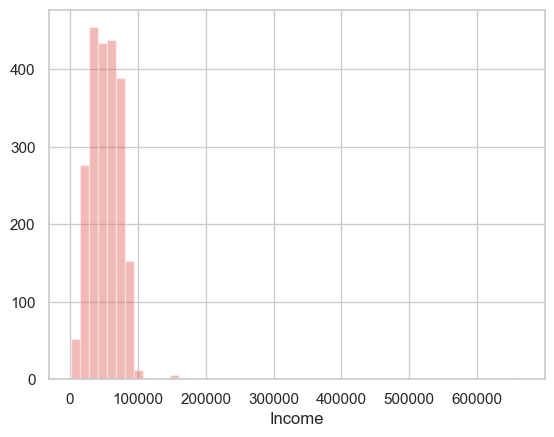

In [24]:
sns.distplot(df['Income'], kde=False, hist=True)

<Axes: >

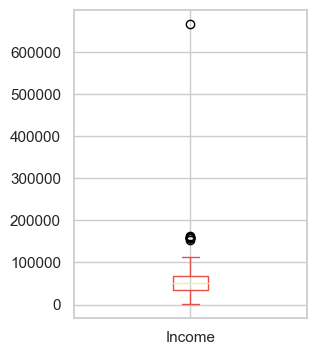

In [25]:
df['Income'].plot(kind='box', figsize=(3,4))

In [26]:
df ['Income'] = df['Income'].fillna(df['Income'].median())
df.isna().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

### Outliers


In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [28]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain'], inplace=True)

In [29]:
df_to_plot

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4
2236,1977,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8
2237,1976,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8
2238,1978,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3


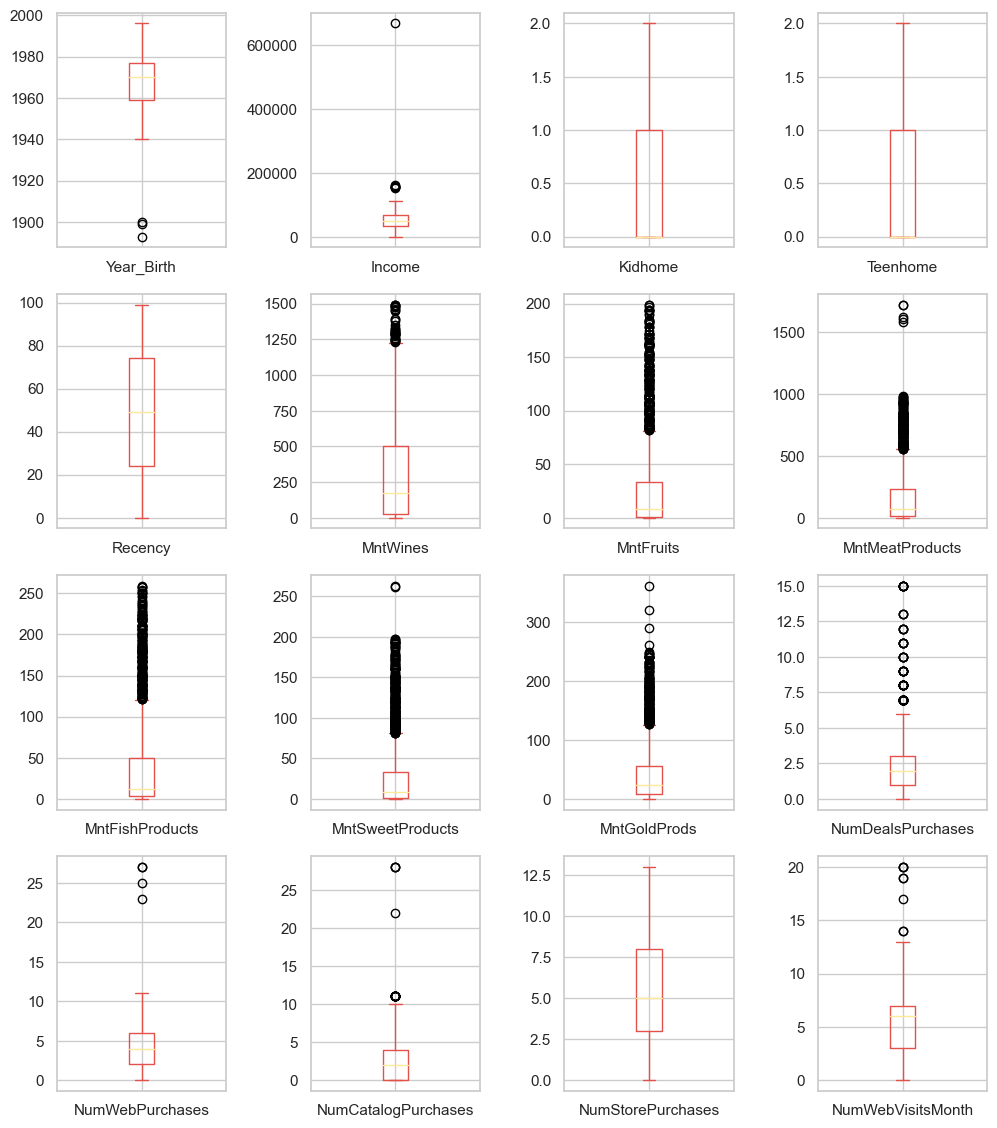

In [30]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

##### Terdapat outliers di kolom year_birth

In [31]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

### Validation 3

- Apakah terdapat distibusi yang tidak masuk akal?

In [32]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

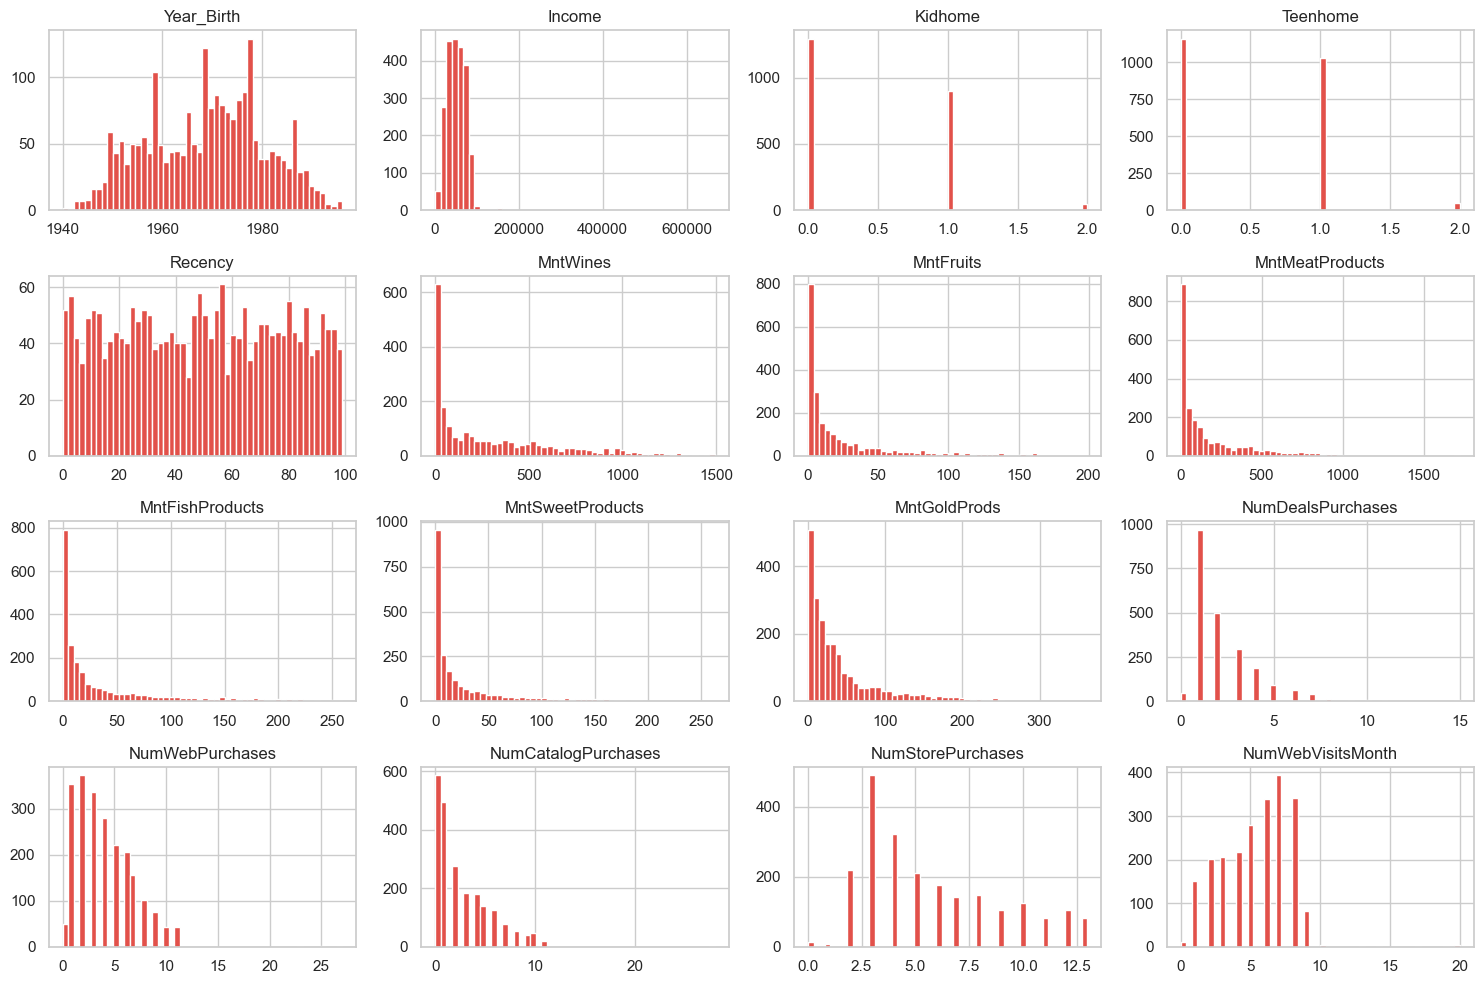

In [33]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

### Data Insight


In [34]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


- Kolom ID dihapus karena hanya menandakan indexing
- Untuk menganalisa karakteristik customer yang cenderung menerima campaign adalah dengan mengetahui usianya
- Oleh karena itu, akan ada kolom tambahan yaitu usia (yg diperoleh dari kolom year_birth dan Dt_customer)

In [35]:
df['Dt_Customer'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2232    2013
2233    2013
2234    2012
2235    2012
2236    2012
Name: Dt_Customer, Length: 2237, dtype: int64

In [36]:
df['Year_Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2232    1976
2233    1977
2234    1976
2235    1978
2236    1969
Name: Year_Birth, Length: 2237, dtype: int64

In [37]:
df['Usia'] = df['Dt_Customer'].dt.year - df['Year_Birth']

jadi Usia customer yang diperoleh adalah usia ketika customer tersebut join member di perusahaan

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


### Year_birth

<Axes: xlabel='Usia', ylabel='Count'>

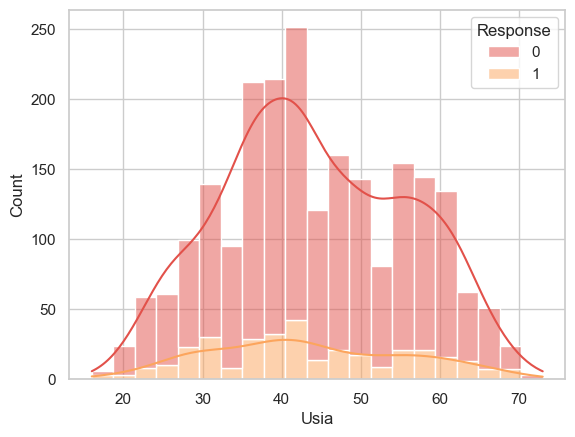

In [39]:
sns.histplot(data=df, x='Usia', hue='Response', multiple='stack', kde=True)

Berdasarkan histogram data Year_Birth dapat disimpulkan bahwa rata-rata customer yang menerima campaign dikasaran usia 40 tahun


### Education

In [40]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

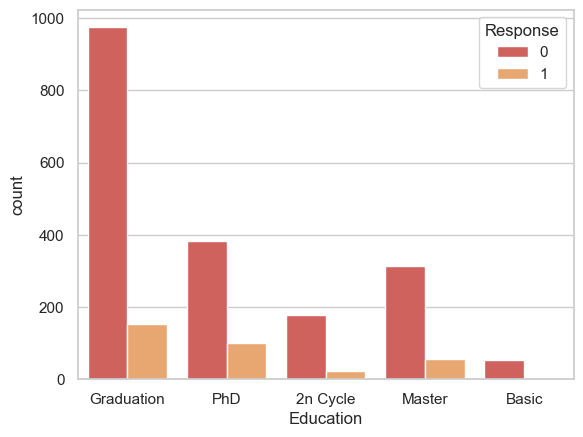

In [41]:
sns.countplot(data=df, x='Education', hue='Response')

In [42]:
def barPerc(df, xVar, ax):
    numX = len(df[xVar].unique())
    bars = ax.patches
    hueBars = [bars[ind::numX] for ind in range(numX)]  # Collecting bars for each category
    
    for hueBar in hueBars:
        total = sum([bar.get_height() for bar in hueBar])  # Calculate total for each category
        
        for bar in hueBar:
            ax.text(
                bar.get_x() + bar.get_width() / 2.,
                bar.get_height(),
                f'{bar.get_height() / total:.0%}',
                ha="center", va="bottom"
            )

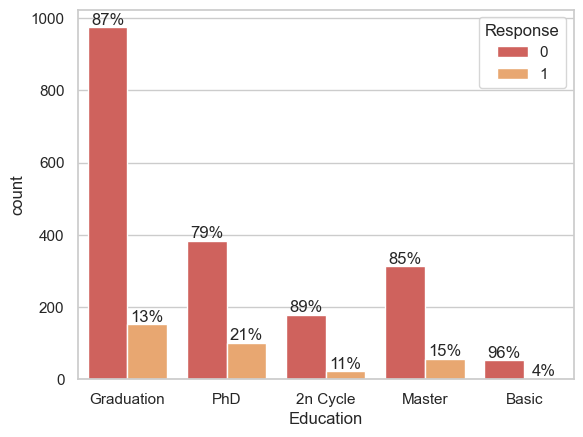

In [43]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

##### PhD memiliki ketertarikan paling tertinggi unutuk menerima penawaran/campaign


(0.0, 175000.0)

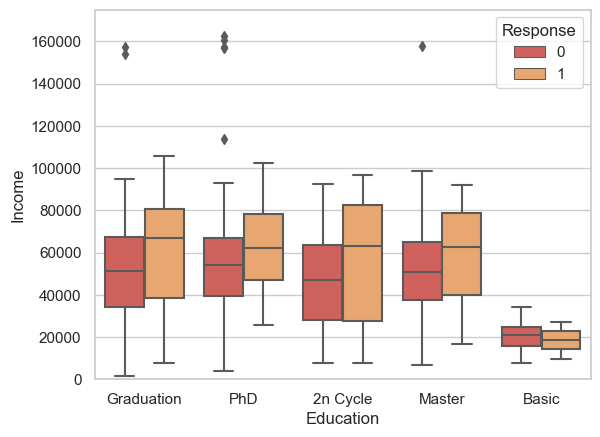

In [44]:
### Menegecek keorelasi antara Education dengan Income

sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

##### Income yang tinggi cenderung menerima penawaran/campaign perusahaan


### Marital_Status

In [45]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [46]:
### Untuk nilai 'Yolo', 'Alone', 'Absurd' seharusnya maknanya sama yaitu 'Single'

df['Marital_Status'] = df['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd' ] else str(x))
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

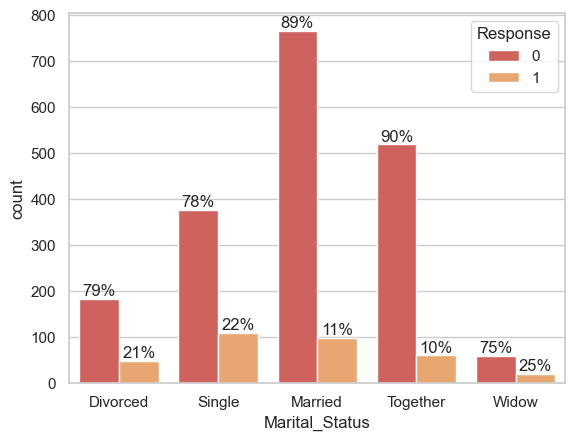

In [47]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

#### Jika customer hidup sendiri/atau membiayai hidupnya sendiri cenderung menerima campaign perusahaan

### Kidhome + Teenhome

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [49]:
df['Jumlah_anak'] = df['Kidhome'] + df['Teenhome']

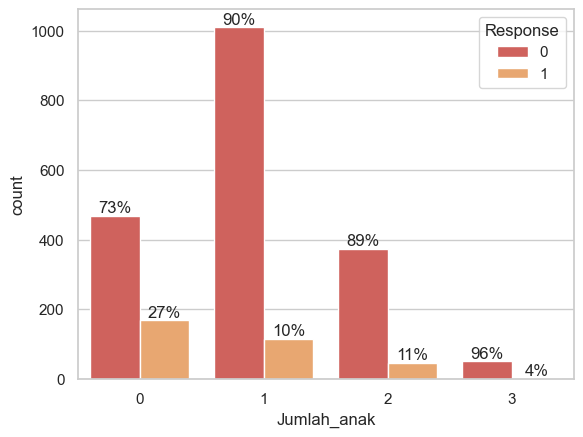

In [50]:
ax = sns.countplot(x='Jumlah_anak', hue='Response', data=df)
barPerc(df, 'Jumlah_anak', ax)

##### Customer yang tinggal sendiri cenderung menerima campaign, hal ini sesuai dengan visualisasi data di kolom Marital_Status

### Dt_customer = Customer Join Date

In [51]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

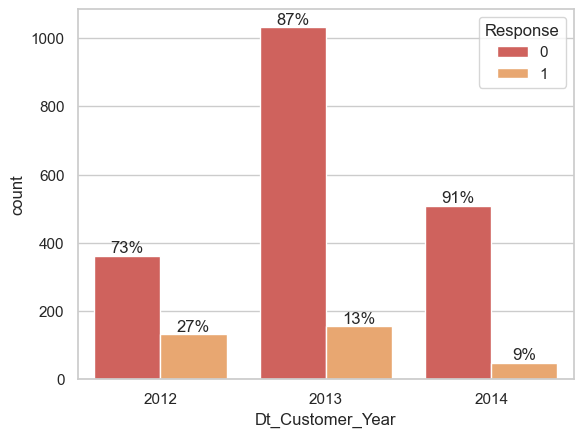

In [52]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

Semakin lama customer sudah join, maka semakin besar juga kemungkinan customer akan menerima penawaran campaign

## Recency

<Axes: xlabel='Recency', ylabel='Count'>

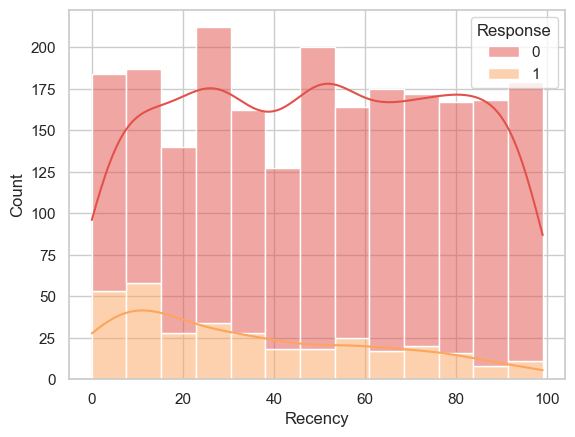

In [53]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde='True' )

In [54]:
### Customer yang belum lama membeli produk, cenderung lebih memilih unutk menerima penawaran campaign

## Amount Spent (MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts,MntGoldProds)	

In [55]:
### Menggabung semua kolon amount dengan list komprensif

amount_spent = [c for c in df.columns if 'Mnt' in str(c)]
amount_spent.append('Response')

In [56]:
### .cor() = default dengan pendekatan korealasi spearman
df[amount_spent].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [57]:
### Menjumlahkan semua amount spent yang dikeluarkan oleh setiap customer
amount_spent = [c for c in df.columns if 'Mnt' in str(c)]
df['Total_Amount'] = df[amount_spent].sum(axis=1)
### Jika axis=0 maka akan menjumlahkan nilai per kolom bukan baris

<Axes: xlabel='Total_Amount', ylabel='Count'>

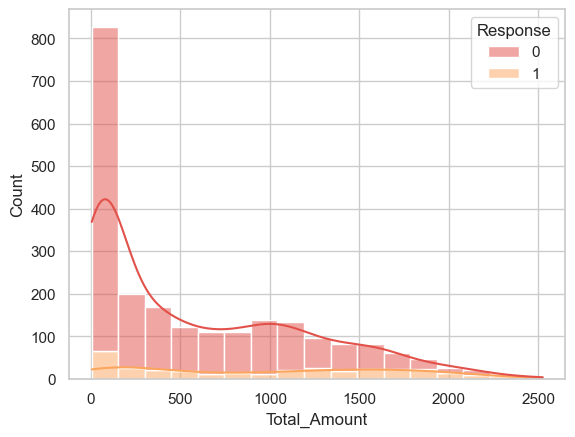

In [58]:
sns.histplot(data=df, x='Total_Amount', hue='Response', multiple='stack', kde=True)

#### Jika customer sudah menghabiskan uangnya sekitar 1000-2000$ maka customer cenderung menerima penewaran campaign

In [59]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


<Axes: xlabel='Income', ylabel='Count'>

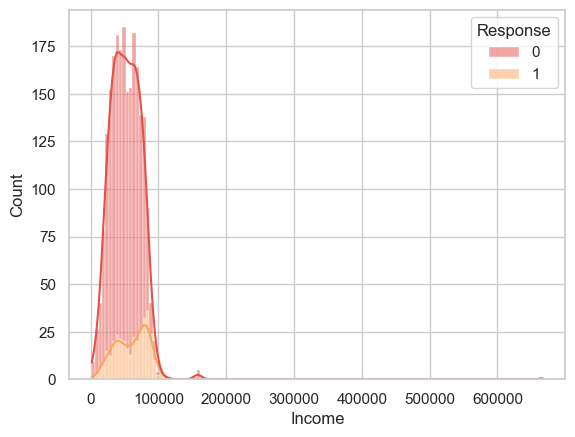

In [60]:
sns.histplot(data=df, x='Income', hue='Response', multiple='stack', kde=True)

### Purchases (NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases)

In [61]:
purchases = [c for c in df.columns if 'Purchase' in str(c)]
purchases.append('Response')

In [62]:
### .cor() = default dengan pendekatan korealasi spearman
df[purchases].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [63]:
#### Tingkat korelasi antara kolom purchase dengan amount_spent itu sama-sama tidak terlalu tinggi (-+20%)

In [64]:
### Menjumlahkan semua amount spent yang dikeluarkan oleh setiap customer
purchases = [c for c in df.columns if 'Purchase' in str(c)]
df['total_purchase'] = df[purchases].sum(axis=1)
### Jika axis=0 maka akan menjumlahkan nilai per kolom bukan baris

<Axes: xlabel='total_purchase', ylabel='Count'>

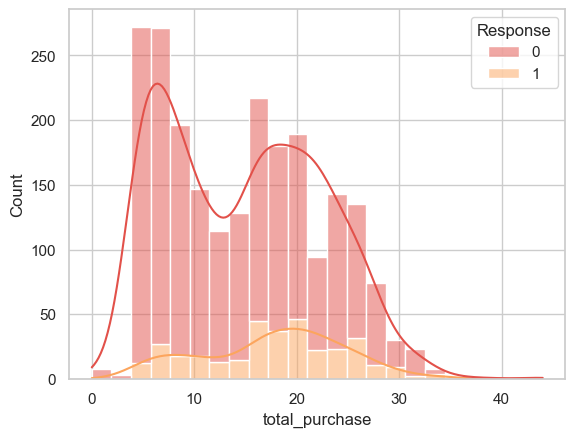

In [65]:
sns.histplot(data=df, x='total_purchase', hue='Response', multiple='stack', kde=True)

In [66]:
#### Tidak ada pola unik, antara respon 1 dengan respon 0

### NumWebVisitMonth

In [67]:
df[['NumWebVisitsMonth','Response']].corr()[['Response']]

### TIdak memiliki korelasi dengan response (karena nilainya mines/mendekati 0)

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


#### Berbeda dengan kolom sebelumnya, kolom NumVisitsMonth menggunakan korelasi pearson yang mengukur kedua hubungan variabel numerik. 
#### Nilai korelasi Pearson dapat berkisar dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan nilai 0 menunjukkan ketiadaan korelasi.

#### Insight : NumWebVisitsMont tidak mempengaruhi customer untuk menerima campaign

In [68]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


#### Previous Campaign (AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2)

In [69]:
cmp =  [c for c in df.columns if 'AcceptedCmp' in str(c)]
cmp.append('Response')

In [143]:
### .cor() = default dengan pendekatan korealasi spearman
df[cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.326634
AcceptedCmp1,0.293982
AcceptedCmp3,0.254258
AcceptedCmp4,0.177019
AcceptedCmp2,0.169293


#### Campaign 1, 3 dan 5 merupakan Campaign yang paling berkolerasi

### Complain

In [71]:
df[['Complain','Response']].corr()[['Response']]

### TIdak memiliki korelasi dengan response (karena nilainya mendekati 0)

,Response
Complain,0.000185
Response,1.000000


### Country

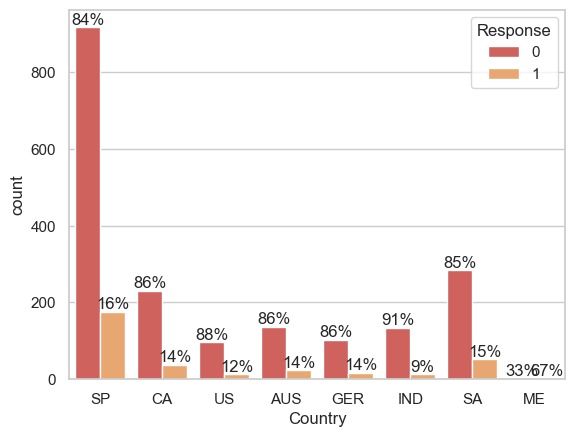

In [72]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

#### Insight : Customer yang berasal dari negara mexico memiliki nilai kecederungan paling tinggi untuk menerima campaign 

In [73]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


# Modelling

### Data Splitting
- Data Train 60%
- Data Validation 20%
- Data Tes 20%

In [74]:
df = pd.read_csv('C:\\Users\\muh.muhaimin nur\\Downloads\\campaign_marketing\\marketing_data.csv')
df.shape

(2240, 28)

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [78]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [79]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

#### Seharusnya eksekusi splitting terlbih dahulu sebelum melakukan cleaning data supaya mencegah ada lackage data
#### Tahap preprocessing

#### ada 3 subset :
- Data Train
- Data Valid
- Data Test

### Nummeric Processing

In [80]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [81]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')


df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])
df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 1935 to 1866
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1344 non-null   int64         
 1   Year_Birth           1344 non-null   int64         
 2   Education            1344 non-null   object        
 3   Marital_Status       1344 non-null   object        
 4   Income               1329 non-null   float64       
 5   Kidhome              1344 non-null   int64         
 6   Teenhome             1344 non-null   int64         
 7   Dt_Customer          1344 non-null   datetime64[ns]
 8   Recency              1344 non-null   int64         
 9   MntWines             1344 non-null   int64         
 10  MntFruits            1344 non-null   int64         
 11  MntMeatProducts      1344 non-null   int64         
 12  MntFishProducts      1344 non-null   int64         
 13  MntSweetProducts     1344 non-

In [83]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [84]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [85]:
df_train['Usia'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Usia'] = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Usia'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [86]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd' ] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd' ] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd' ] else str(x))

In [87]:
df_train['Jumlah_anak'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Jumlah_anak'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Jumlah_anak'] = df_test['Kidhome'] + df_test['Teenhome']

In [88]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [89]:
amount_spent = [c for c in df.columns if 'Mnt' in str(c)]
df_train['Total_Amount'] = df_train[amount_spent].sum(axis=1)
df_valid['Total_Amount'] = df_valid[amount_spent].sum(axis=1)
df_test['Total_Amount'] = df_test[amount_spent].sum(axis=1)

In [90]:
purchases = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchase'] = df_train[purchases].sum(axis=1)
df_valid['Total_Purchase'] = df_valid[purchases].sum(axis=1)
df_test['Total_Purchase'] = df_test[purchases].sum(axis=1)

In [91]:
display(df_train.head())
print()

display(df_valid.head())
print()

display(df_test.head())
print()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


In [92]:
df_train.isna().sum().sort_values(ascending=False)

ID                     0
Response               0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Year_Birth             0
Country                0
Usia                   0
Jumlah_anak            0
Dt_Customer_Month      0
Dt_Customer_Year       0
Total_Amount           0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Total_Purchase         0
dtype: int64

In [93]:
df_valid.isna().sum().sort_values(ascending=False)

ID                     0
Response               0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Year_Birth             0
Country                0
Usia                   0
Jumlah_anak            0
Dt_Customer_Month      0
Dt_Customer_Year       0
Total_Amount           0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Total_Purchase         0
dtype: int64

In [94]:
df_test.isna().sum().sort_values(ascending=False)

ID                     0
Response               0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Year_Birth             0
Country                0
Usia                   0
Jumlah_anak            0
Dt_Customer_Month      0
Dt_Customer_Year       0
Total_Amount           0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Total_Purchase         0
dtype: int64

In [95]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [96]:
cmp_kolom = [c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_kolom = [c for c in df.columns if 'Mnt' in str(c)] 
num_kolom = [c for c in df.columns if 'Num'  in str(c)]

numeric_kolom = ['Income', 'Kidhome','Teenhome','Recency','Complain', 'Usia', 'Jumlah_anak', 
                 'Dt_Customer_Month', 'Dt_Customer_Year', 'Total_Amount', 'Total_Purchase']

In [97]:
all_numeric = cmp_kolom + mnt_kolom + num_kolom + numeric_kolom

In [98]:
display(df_train[all_numeric].head(2))
display(df_valid[all_numeric].head(2))
display(df_test[all_numeric].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


### Categoric Processing

In [99]:
all_kategori = ['Education', 'Marital_Status', 'Country']

In [100]:
all_kolom = all_kategori + all_numeric

In [101]:
df_train_final = df_train[all_kolom]
df_valid_final = df_valid[all_kolom]
df_test_final = df_test[all_kolom]

In [102]:
### kolom kategori :
#    - Education (Ordinal)
#    - Marital_Status (Nominal)
#    - Country (Nominal)

In [103]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [104]:
education = {'Basic':1, 'Graduation':2 , '2n Cycle':3 , 'Master':4 , 'PhD':5}

In [105]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [106]:
df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


In [107]:
from sklearn.preprocessing import OneHotEncoder

# Kolom yang akan di-encode
columns_to_encode = ['Marital_Status', 'Country']

# Membuat instance OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit dan transform data pelatihan
encoded_train = encoder.fit_transform(df_train_final[columns_to_encode])
encoded_valid = encoder.transform(df_valid_final[columns_to_encode])
encoded_test = encoder.transform(df_test_final[columns_to_encode])

# Membuat DataFrame baru untuk hasil encoding
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(input_features=columns_to_encode))
encoded_valid_df = pd.DataFrame(encoded_valid, columns=encoder.get_feature_names_out(input_features=columns_to_encode))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(input_features=columns_to_encode))

# Menggabungkan hasil encoding dengan data lainnya
df_train_final_encoded = pd.concat([df_train_final.drop(columns=columns_to_encode), encoded_train_df], axis=1)
df_valid_final_encoded = pd.concat([df_valid_final.drop(columns=columns_to_encode), encoded_valid_df], axis=1)
df_test_final_encoded = pd.concat([df_test_final.drop(columns=columns_to_encode), encoded_test_df], axis=1)

# Sekarang df_train_final_encoded, df_valid_final_encoded, dan df_test_final_encoded
# memiliki kolom 'Marital_Status' dan 'Country' yang sudah diencode dalam bentuk one-hot

df_train_final_encoded.head()

,Education,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,5,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
df_train.Country.unique()

array(['CA', 'SP', 'SA', 'AUS', 'IND', 'US', 'GER', 'ME'], dtype=object)

In [109]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1343 non-null   int64  
 1   Marital_Status       1343 non-null   object 
 2   Country              1343 non-null   object 
 3   AcceptedCmp3         1343 non-null   int64  
 4   AcceptedCmp4         1343 non-null   int64  
 5   AcceptedCmp5         1343 non-null   int64  
 6   AcceptedCmp1         1343 non-null   int64  
 7   AcceptedCmp2         1343 non-null   int64  
 8   MntWines             1343 non-null   int64  
 9   MntFruits            1343 non-null   int64  
 10  MntMeatProducts      1343 non-null   int64  
 11  MntFishProducts      1343 non-null   int64  
 12  MntSweetProducts     1343 non-null   int64  
 13  MntGoldProds         1343 non-null   int64  
 14  NumDealsPurchases    1343 non-null   int64  
 15  NumWebPurchases      1343 non-null   i

## Modelling

- X : variabel independent
- Y : variabel Dependent (Varibael target --> Respon)

In [110]:
X_train_final = df_train_final_encoded
X_valid_final = df_valid_final_encoded
X_test_final = df_test_final_encoded

y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

Logistic Regression


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [112]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [113]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [114]:
print('logisticregression result : ' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

logisticregression result :  0.746


Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [117]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [118]:
print('Random Forest result : ' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

Random Forest result :  0.882


Performa Stability Check

In [126]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [125]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [127]:
y_test_pred = model.predict_proba(X_test_final)[:,1]
print('Random Forest result : ' , roc_auc_score(y_test_final, y_test_pred).round(3))

Random Forest result :  0.871


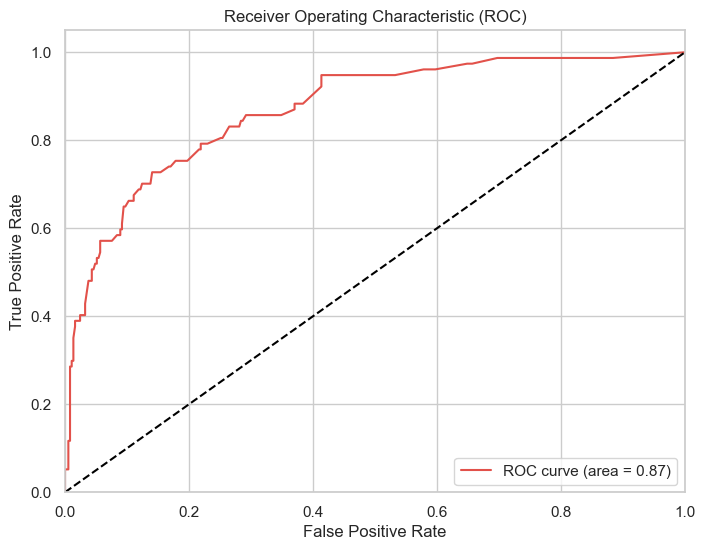

In [128]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Menggabungkan data pelatihan dan validasi
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

# Menghitung nilai probabilitas prediksi positif
y_pred_prob = model.predict_proba(X_test_final)[:, 1]

# Menghitung AUC-ROC
roc_auc = roc_auc_score(y_test_final, y_pred_prob)

# Menghitung false positive rate (FPR) dan true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [698]:
X_test_final.head()

,Education,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,2,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,0,0,0,0,0,108,1,28,13,1,4,2,3,1,4,8,31497.0,0,1,22,0,50,1,12,2012,155,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,0,0,0,0,0,492,0,37,7,0,42,3,6,3,8,5,52597.0,0,1,69,0,52,1,5,2014,578,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0,1,0,0,0,456,4,24,0,0,9,7,8,2,6,7,57954.0,1,1,52,0,37,2,6,2014,493,23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Interpation

In [145]:
# Prediksi pada dataset pengujian
y_test_pred = model.predict_proba(X_test_final)[:, 1]

# Interpretasi hasil prediksi
threshold = 0.5
predicted_labels = ['Menerima' if pred >= threshold else 'Tidak Menerima' for pred in y_test_pred]

# DataFrame hasil prediksi untuk dataset pengujian
result_df_test = pd.DataFrame({'Prediction_Probability': y_test_pred, 'Predicted_Label': predicted_labels})
result_df_test['ID'] = X_test_final.index
df_with_predictions = pd.merge(df_test, result_df_test, left_index=True, right_on='ID', how='left')


df_with_predictions.head()

,ID,ID_x,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Usia,Jumlah_anak,Dt_Customer_Month,Dt_Customer_Year,Total_Amount,Total_Purchase,Prediction_Probability,Predicted_Label,ID_y
0,0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17,0.100,Tidak Menerima,0
1,1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14,0.070,Tidak Menerima,1
2,2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10,0.045,Tidak Menerima,2
3,3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20,0.060,Tidak Menerima,3
4,4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23,0.165,Tidak Menerima,4


In [147]:
df_with_predictions.to_excel('Prediksi-Campaing.xlsx', index=False)

In [136]:
import shap

In [137]:
kesimpulan = shap.TreeExplainer(model)
shap_values = kesimpulan.shap_values(X_test_final)

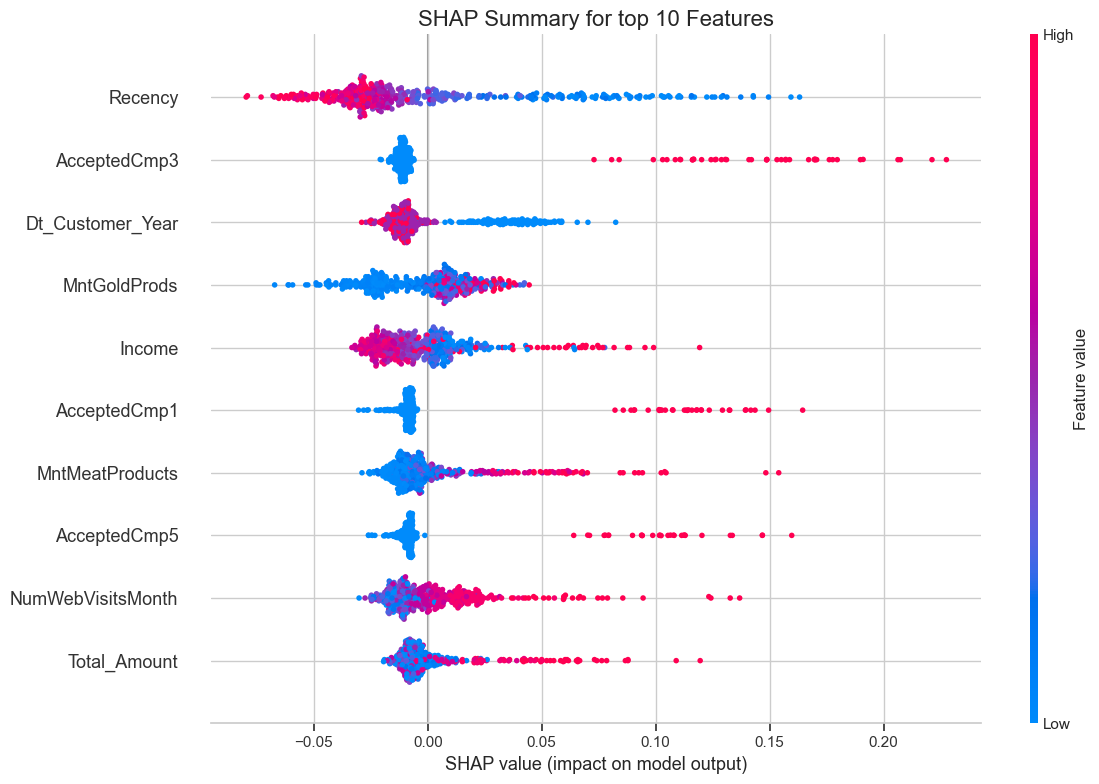

In [138]:
plt.title('SHAP Summary for top 10 Features', size=16)
shap.summary_plot(shap_values[1], X_test_final, max_display=10, plot_size=[12,8])